## EDA

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

Se cargan los tres Datasets para inicial el analisis

In [8]:
games = pd.read_parquet('../Dataset/steam_games.parquet')
reviews = pd.read_parquet('../Dataset/user_review.parquet')
items = pd.read_parquet('../Dataset/user_items.parquet')
final = pd.read_parquet('../Dataset/data_final.parquet')

## Juegos y generos mas jugados por la comunidad

Top 5 juego con mas horas jugadas (playtime_forever)

In [9]:
# se sacan las horas
top_5 = final[['title','playtime_forever']].groupby('title').sum()
# agarramos el top 5 
juego_mas_jugado = top_5['playtime_forever'].sort_values(ascending=False).head(5)

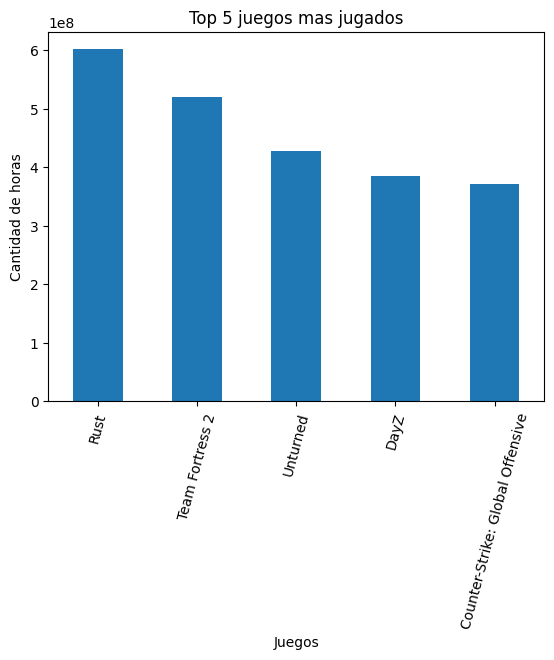

In [10]:
# Creamos el grafico de barras
juego_mas_jugado.plot(kind='bar')
plt.title('Top 5 juegos mas jugados')
plt.xlabel('Juegos')
plt.ylabel('Cantidad de horas')
plt.xticks(rotation=75)
plt.show()

El juego con mas horas jugadas es Rust 

Top 5 de los Generos mas jugados

In [11]:
# se sacan las horas
top_5_generos = final[['genres','playtime_forever']].groupby('genres').sum()
# Agarramos el top 5 
genero_mas_jugado = top_5_generos['playtime_forever'].sort_values(ascending=False).head(5)

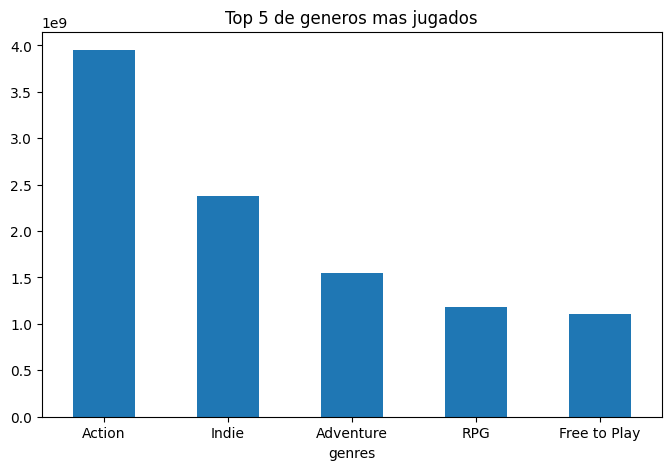

In [19]:
# Grafico de barras
plt.figure(figsize=(8, 5)) 
genero_mas_jugado.plot(kind='bar')
plt.title('Top 5 de generos mas jugados')
plt.xticks(rotation=0)
plt.show()


Se observa una tendencia clara con el género Action, ya que es el que más gusta en lo usuarios

##

## Analisis de sentimientos

Top 5 juegos mas recomendados

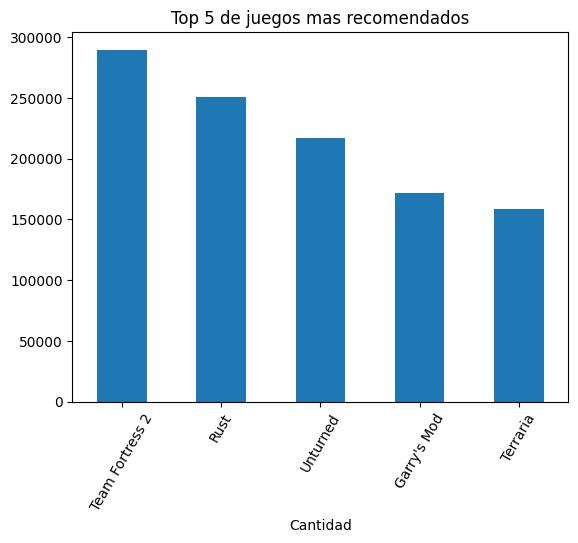

In [22]:
recomendado = final[final['recommend']==True]
juegos_recomendados = recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_recomendados
juegos_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos mas recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()


top de los 5 juegos mas recomendados:

* Team Fortress 2
* Rust
* Unturned
* Garry´s Mod
* Terraria

Top 5 juegos menos recomendados

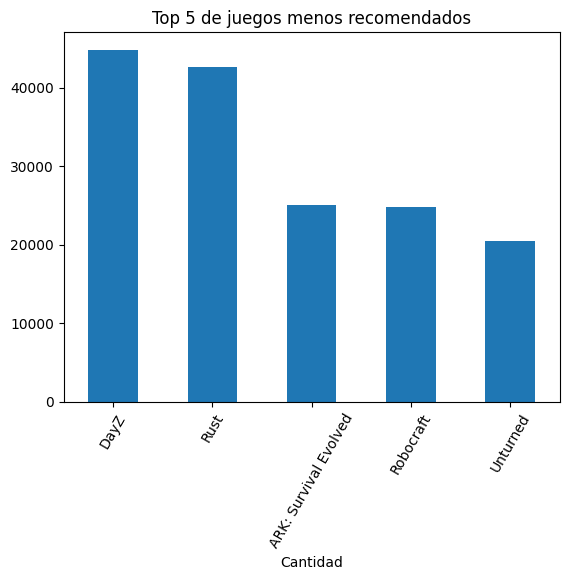

In [21]:
no_recomendado = final[final['recommend']==False]
juegos_no_recomendados = no_recomendado.groupby(['title'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_no_recomendados
juegos_no_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos menos recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

top de los 5 juegos mas recomendados:

* DayZ
* Rust
* Unturned
* Garry´s Mod
* Terraria

Top 5 de juegos con reseñas positivas

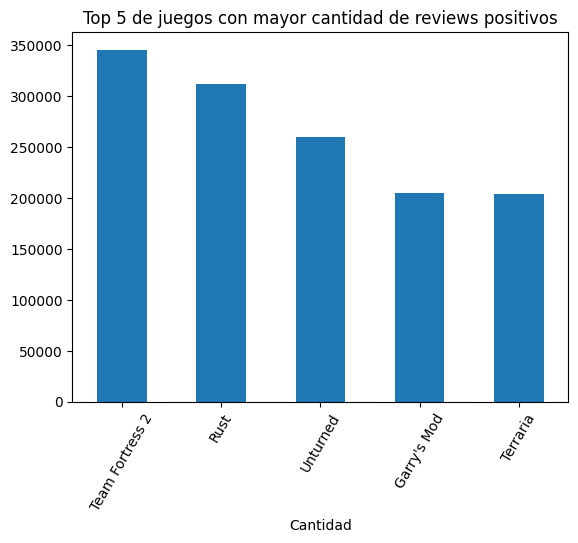

In [15]:
# grafico de barras
positivas = final[final['sentiment_analysis']==2]
juegosAnalysis = positivas[['title', 'sentiment_analysis']].groupby('title')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de juegos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

Top 5 de generos con reseñas positivas

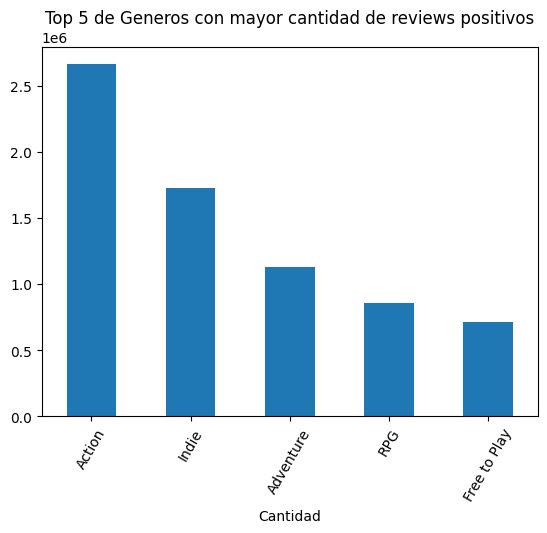

In [16]:
# grafico de barras
juegosAnalysis = positivas[['genres', 'sentiment_analysis']].groupby('genres')['sentiment_analysis'].sum().sort_values(ascending=False).head(5)
juegosAnalysis.plot(kind='bar')
juegosAnalysis
plt.title('Top 5 de Generos con mayor cantidad de reviews positivos')
plt.xlabel('Cantidad')
plt.xticks(rotation = 60)
plt.show()

## Analisis de Outliers

Precio

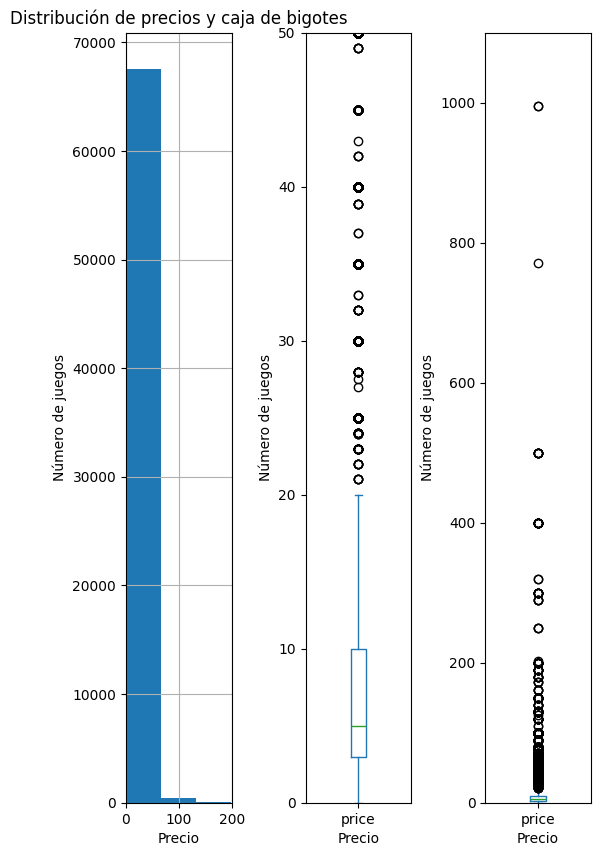

In [17]:
# Grafica de distribucion de precios
plt.subplot(1,3,1)
games['price'].hist(bins = 15, figsize=(6,10))
plt.title('Distribución de precios y caja de bigotes')
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.xlim(0, 200)

# Grafica de caja de bigotes para ver outliers
plt.subplot(1,3,2)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0,50)

plt.subplot(1,3,3)
games['price'].plot.box()
plt.xlabel('Precio')
plt.ylabel('Número de juegos')
plt.ylim(0, 1100 )

plt.subplots_adjust(wspace=0.7)
plt.show()


En la segunda grafica se observa la media del precio de los juegos y como de distribuyen los outliers, en la tercera grafica hay un valor realmente atipico de mil dolares por un juego, a menos que sea un juego de coleccion ese dato no puede ser real